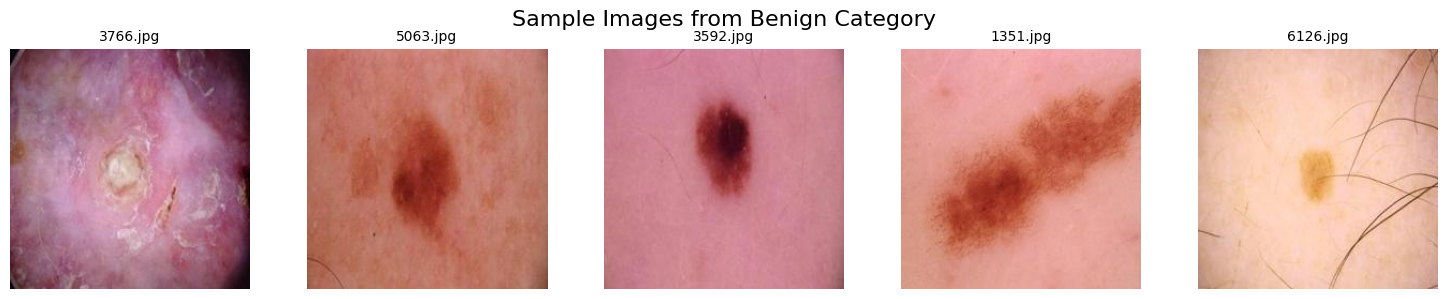

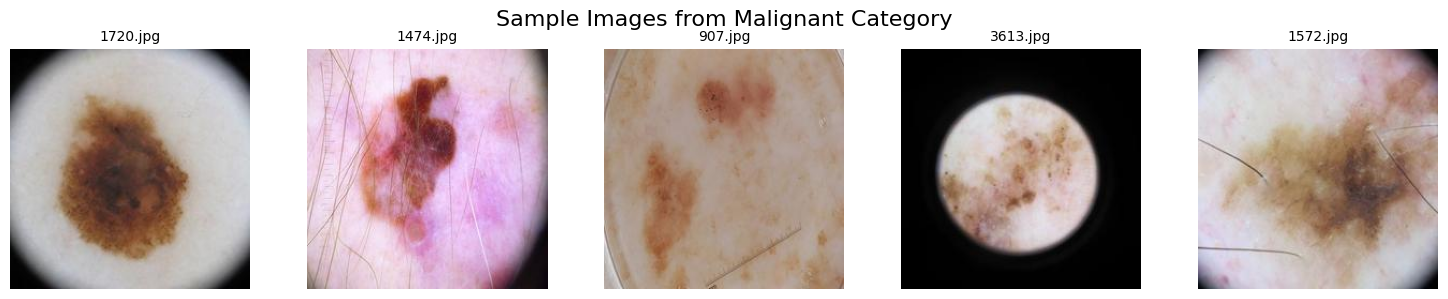

Number of benign images: 6289
Number of malignant images: 5590


In [ ]:

import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

def plot_sample_images(directory, num_images=5, category_name="Category"):

    all_image_files = [fname for fname in os.listdir(directory)
                      if fname.lower().endswith(('.jpg', '.png', '.jpeg'))]
    images = [os.path.join(directory, fname) for fname in all_image_files]

    num_to_sample = min(num_images, len(images))

    if len(images) == 0:
        print(f"No images found in {directory}")
        return

    selected_images = random.sample(images, num_to_sample)

    plt.figure(figsize=(15, 3))

    valid_images = 0
    for i, img_path in enumerate(selected_images):
        try:

            img = cv2.imread(img_path)
            if img is None:
                raise Exception("Image could not be read")

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            filename = os.path.basename(img_path)
            plt.subplot(1, num_images, valid_images + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(filename, fontsize=10)
            valid_images += 1
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

    if valid_images > 0:
        plt.suptitle(f"Sample Images from {category_name} Category", fontsize=16, y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()
    else:
        plt.close()
        print(f"No valid images could be displayed from {category_name}")



def count_images_by_class(base_dir):

    benign_dir = os.path.join(base_dir, 'Benign')
    malignant_dir = os.path.join(base_dir, 'Malignant')

    benign_count = len([f for f in os.listdir(benign_dir)
                        if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    malignant_count = len([f for f in os.listdir(malignant_dir)
                           if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

    return benign_count, malignant_count


base_dir = '/home/my_dataset/train/'
benign_count, malignant_count = count_images_by_class(base_dir)

# Plot sample images with filenames
plot_sample_images(os.path.join(base_dir, 'Benign'), num_images=5, category_name="Benign")
plot_sample_images(os.path.join(base_dir, 'Malignant'), num_images=5, category_name="Malignant")

# Display the count
print(f"Number of benign images: {benign_count}")
print(f"Number of malignant images: {malignant_count}")


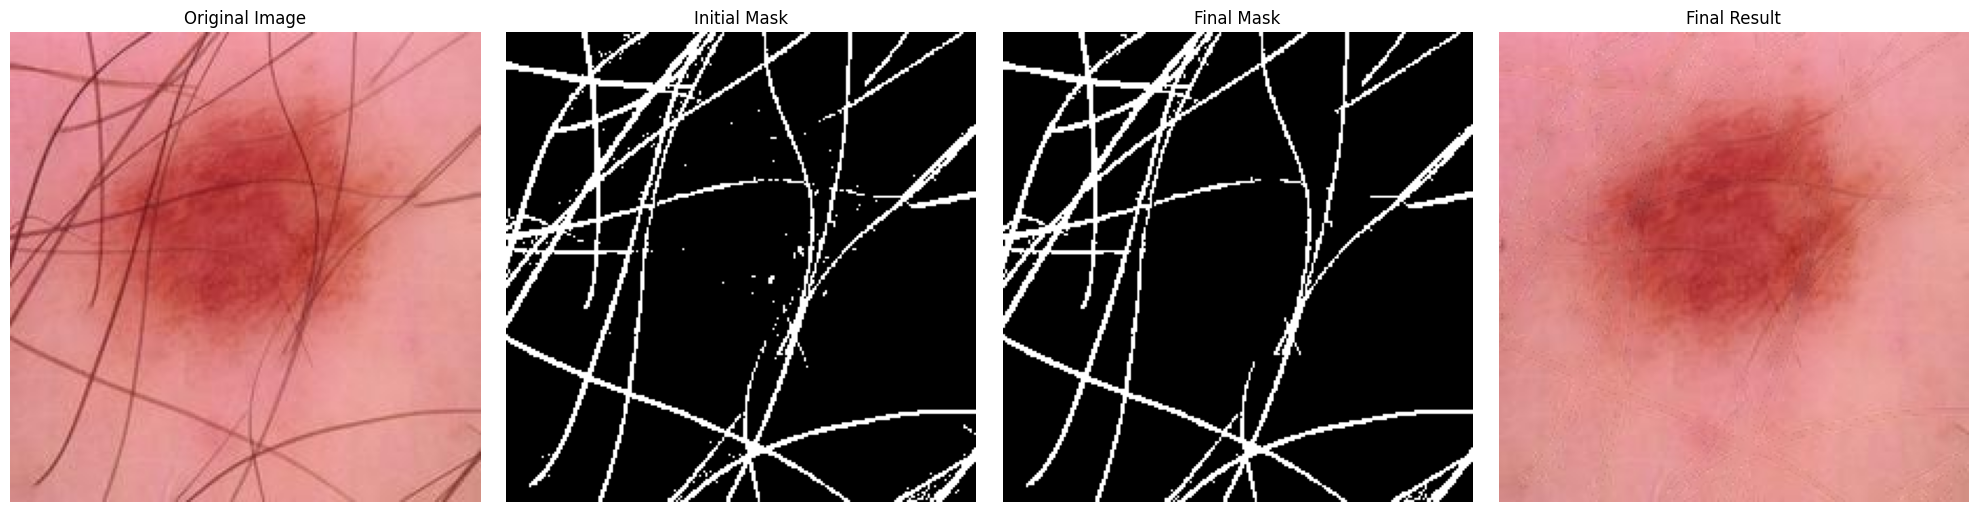

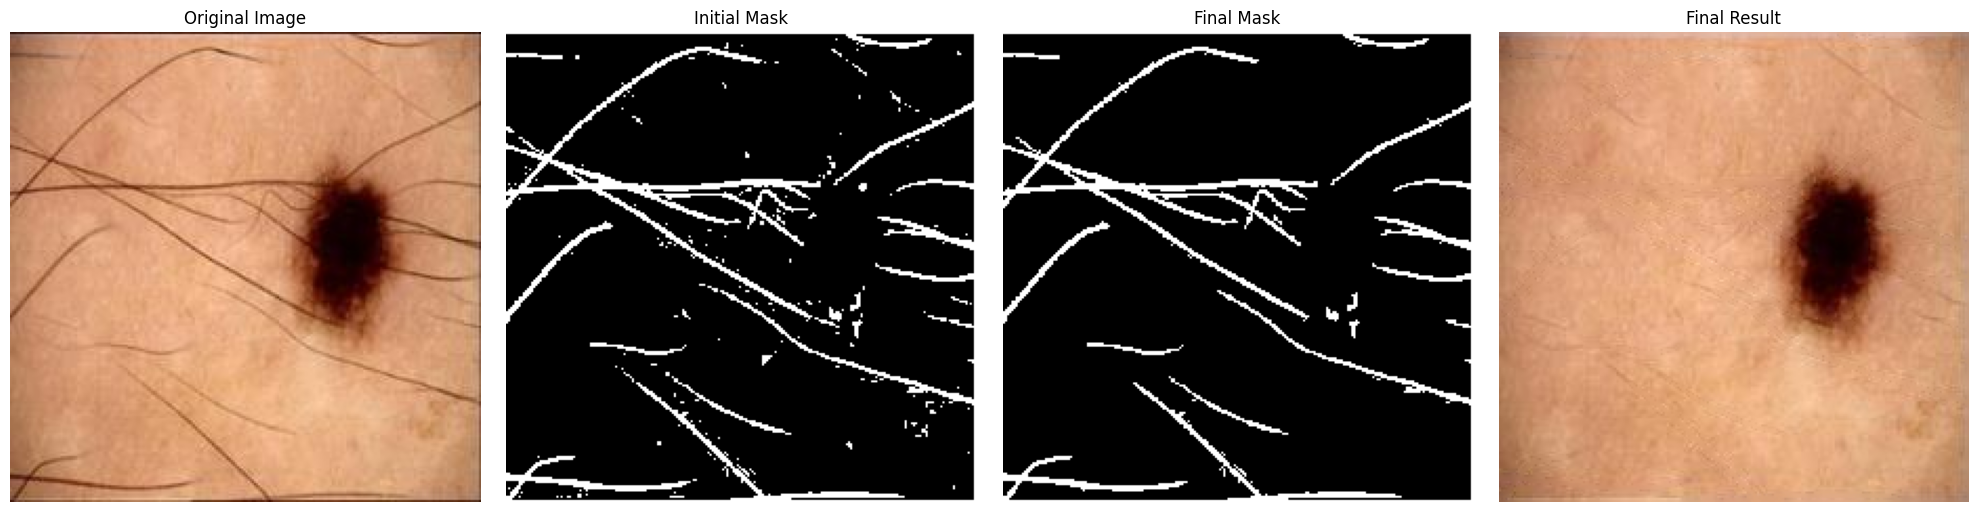

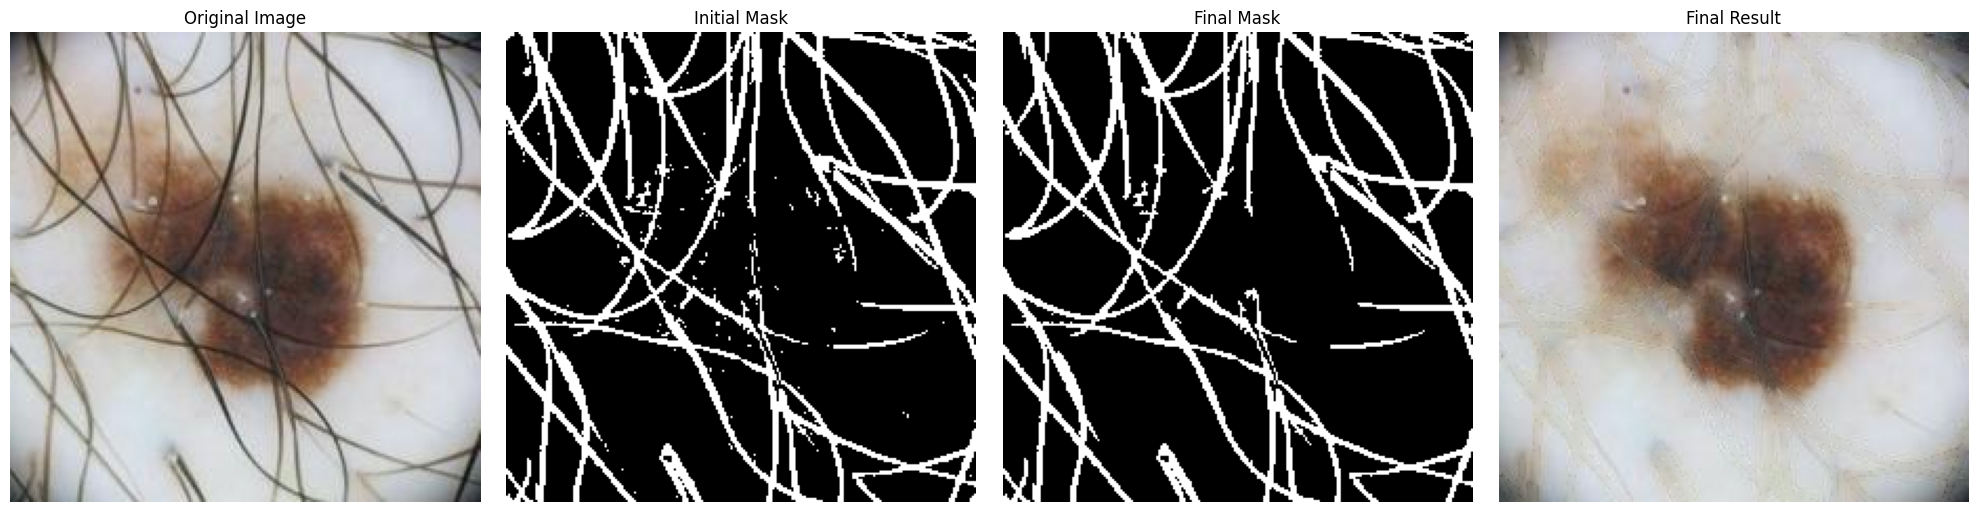

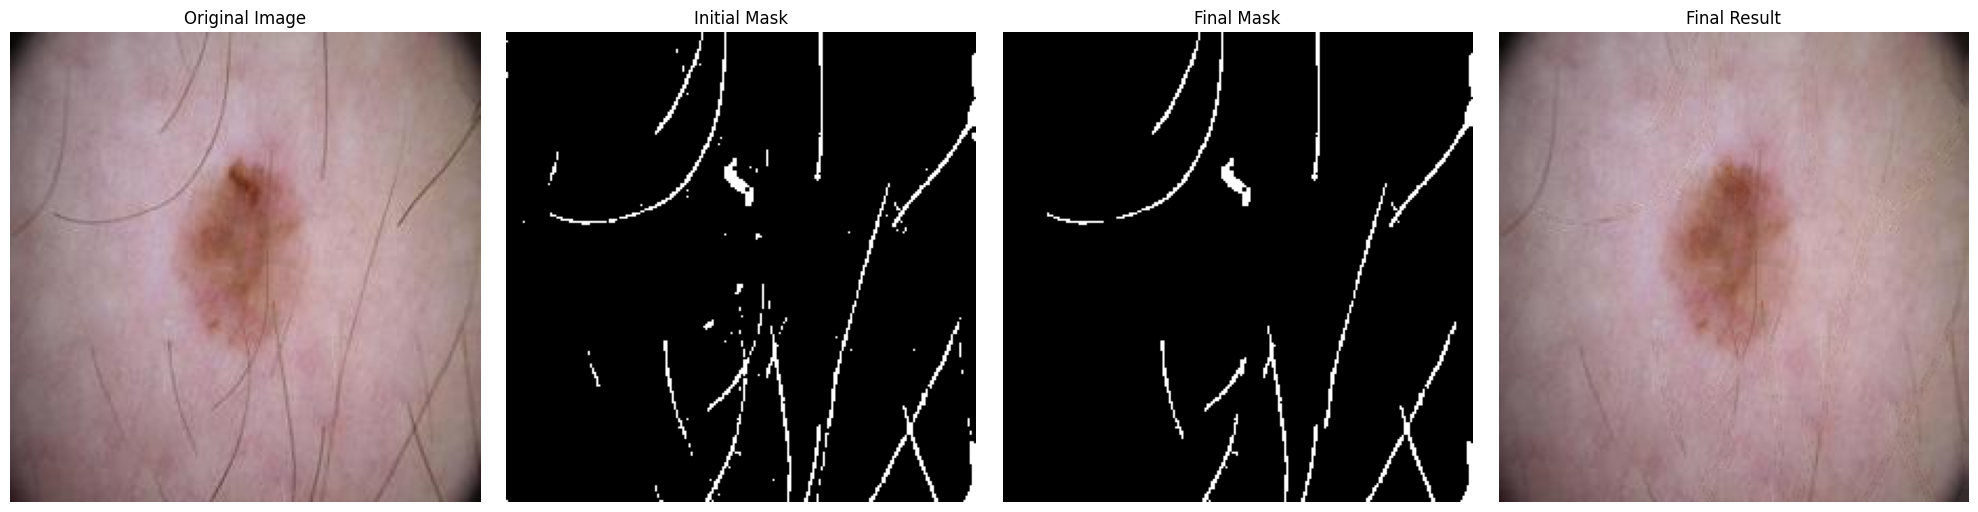

In [ ]:
# HAIR REMOVAL DEMONSTRATION
from utils.image_preprocessing import adaptive_dullrazor,smoothen_rounded_border
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_processing_steps(img_path):

    img_final, initial_mask, mask = adaptive_dullrazor(img_path)
    final = smoothen_rounded_border(img_final)
    final = cv2.cvtColor(final, cv2.COLOR_RGB2BGR)
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)


    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')


    if len(initial_mask.shape) == 2:

        axes[1].imshow(initial_mask, cmap='gray')
    else:
        axes[1].imshow(initial_mask)
    axes[1].set_title('Initial Mask')
    axes[1].axis('off')


    if len(mask.shape) == 2:
        axes[2].imshow(mask, cmap='gray')
    else:
        axes[2].imshow(mask)
    axes[2].set_title('Final Mask')
    axes[2].axis('off')


    final_rgb = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
    axes[3].imshow(final_rgb)
    axes[3].set_title('Final Result')
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()


visualize_processing_steps('/home/my_dataset/train/Benign/1167.jpg')
visualize_processing_steps('/home/my_dataset/train/Benign/3813.jpg')
visualize_processing_steps('/home/my_dataset/train/Malignant/3322.jpg')
visualize_processing_steps('/home/my_dataset/train/Malignant/2279.jpg')


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


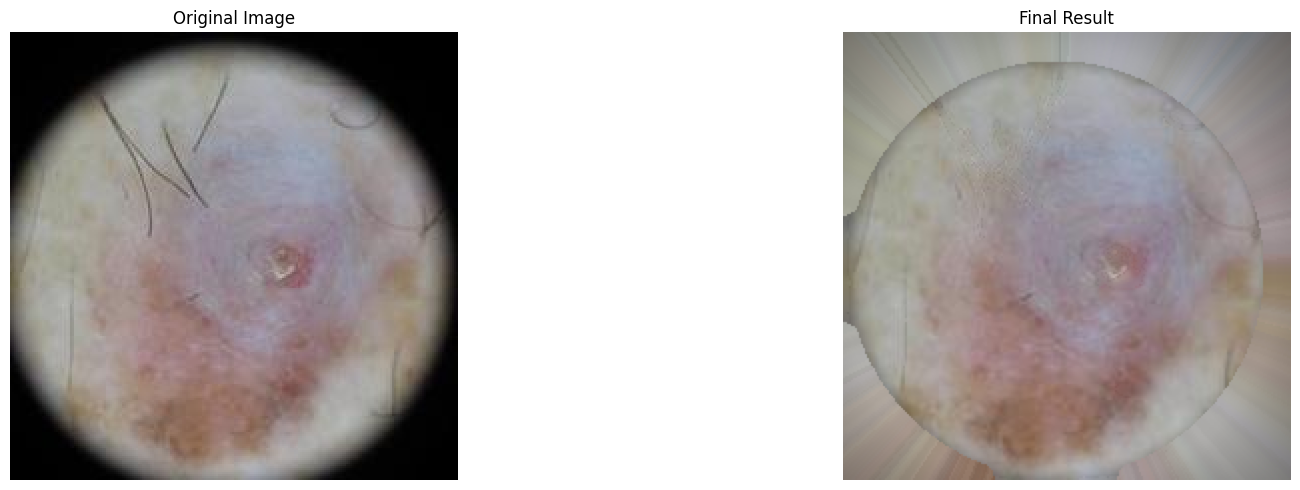

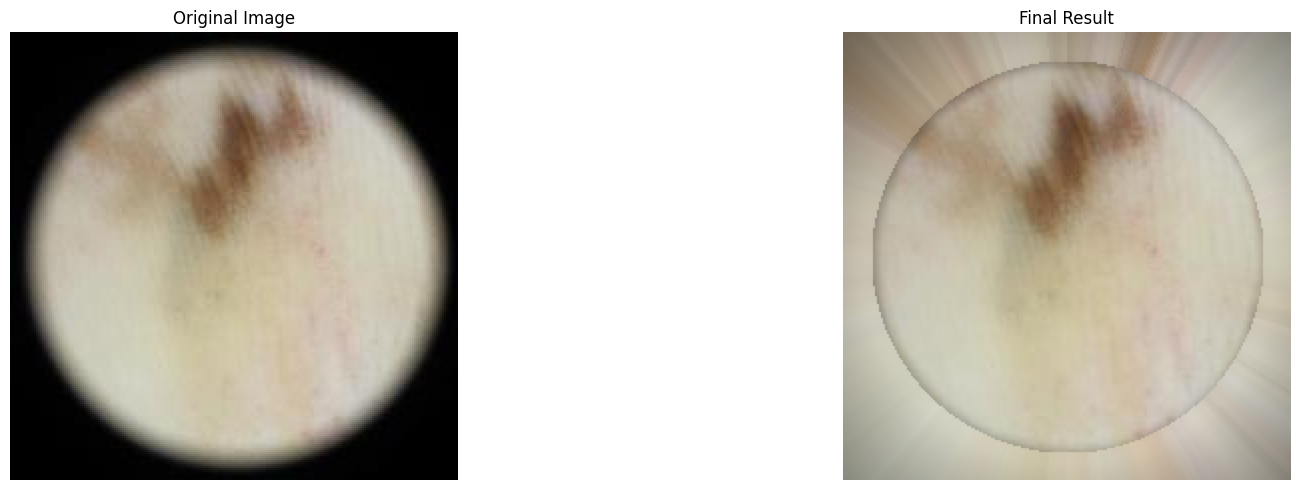

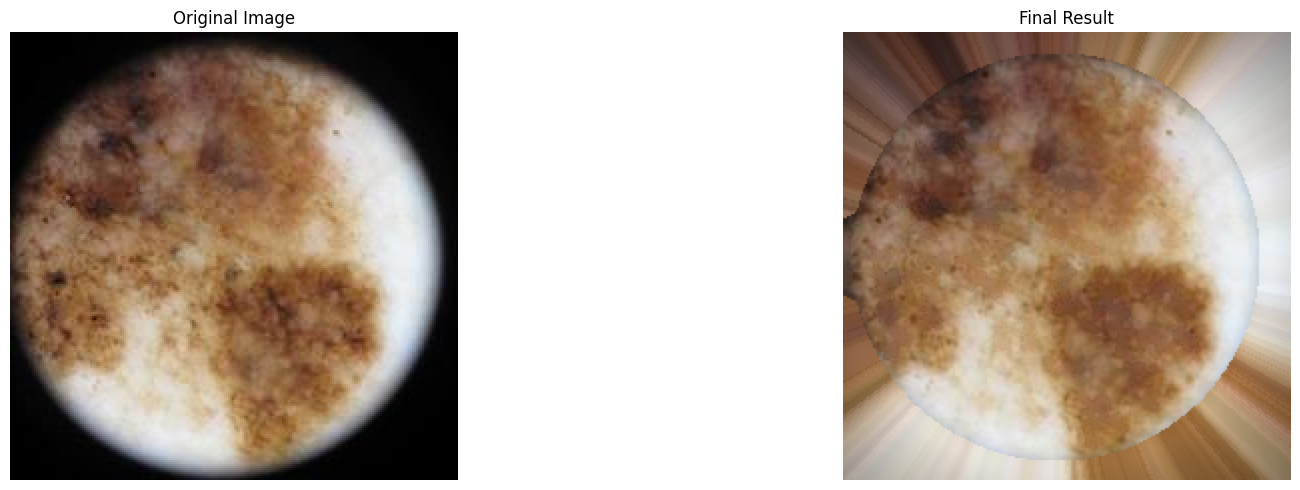

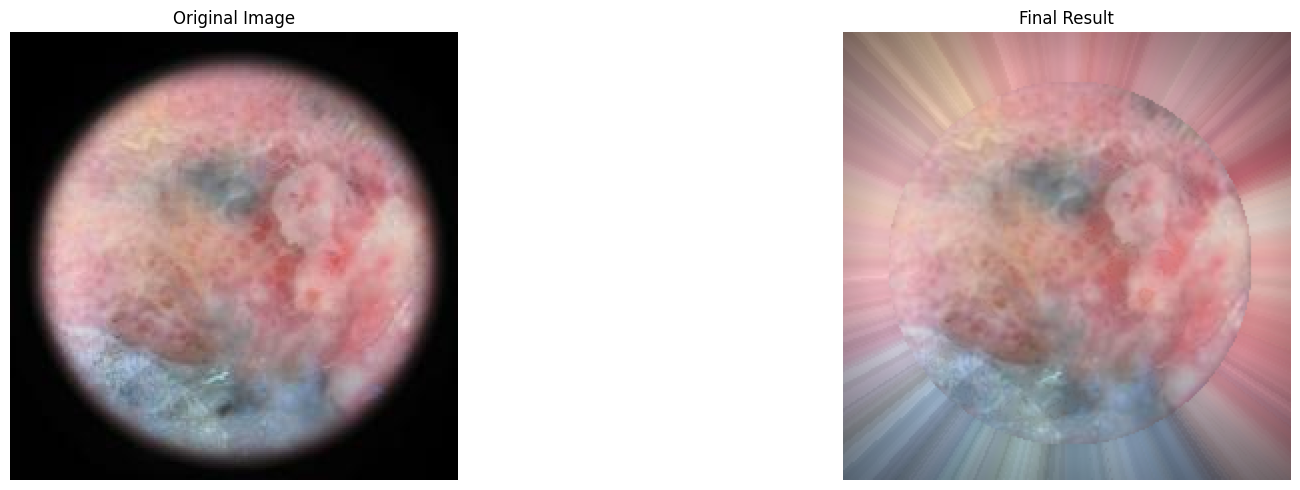

In [ ]:
# Black Round Border smoothening DEMONSTRATION
from utils.image_preprocessing import adaptive_dullrazor,smoothen_rounded_border
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_processing_steps(img_path):

    img_final, initial_mask, mask = adaptive_dullrazor(img_path)
    final = smoothen_rounded_border(img_final)
    final = cv2.cvtColor(final, cv2.COLOR_RGB2BGR)
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)


    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')




    final_rgb = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
    axes[1].imshow(final_rgb)
    axes[1].set_title('Final Result')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


visualize_processing_steps('/home/my_dataset/train/Malignant/2656.jpg')
visualize_processing_steps('/home/my_dataset/train/Malignant/4025.jpg')
visualize_processing_steps('/home/my_dataset/train/Malignant/5096.jpg')
visualize_processing_steps('/home/my_dataset/train/Malignant/3096.jpg')


/content/drive/MyDrive/ml_project
Loading model from: /content/drive/MyDrive/ml_project/results/best_efficientnet_b0_focal_loss.pth
Model loaded successfully!
Predicted Class: Benign
Confidence: 98.78%

Class Probabilities:
  Benign: 98.78%
  Malignant: 1.22%


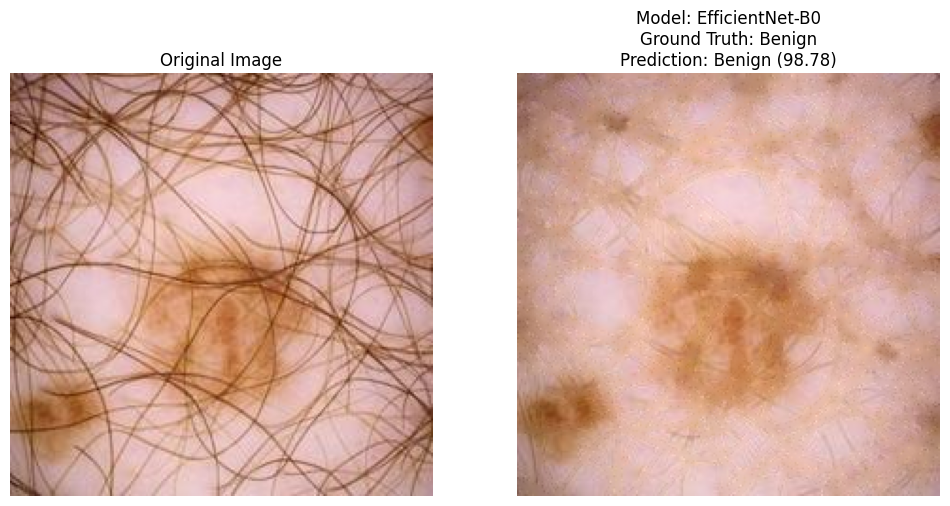

Predicted Class: Malignant
Confidence: 99.29%

Class Probabilities:
  Malignant: 99.29%
  Benign: 0.71%


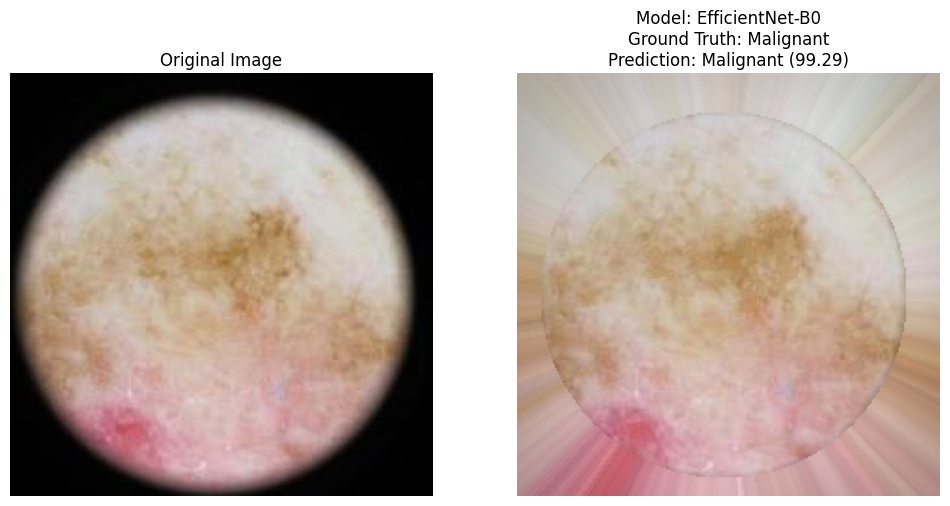

Predicted Class: Benign
Confidence: 83.55%

Class Probabilities:
  Benign: 83.55%
  Malignant: 16.45%


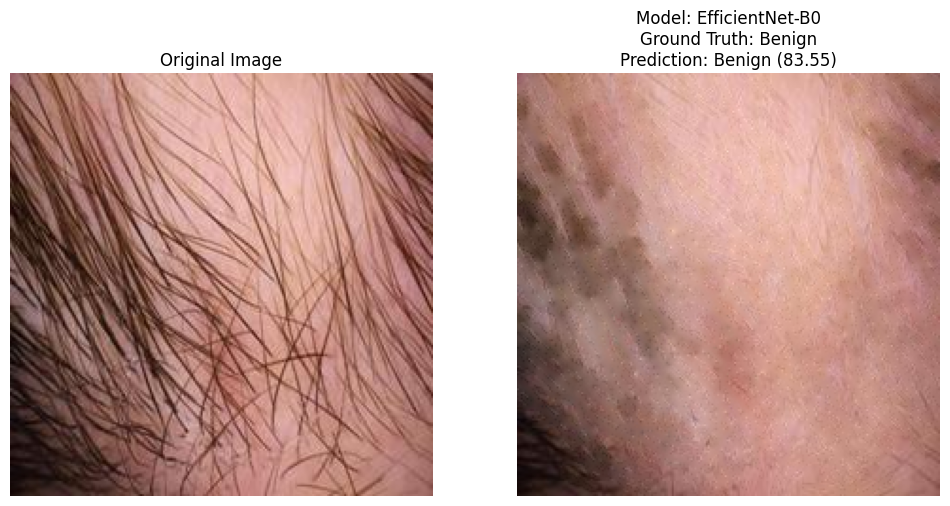

Predicted Class: Malignant
Confidence: 81.00%

Class Probabilities:
  Malignant: 81.00%
  Benign: 19.00%


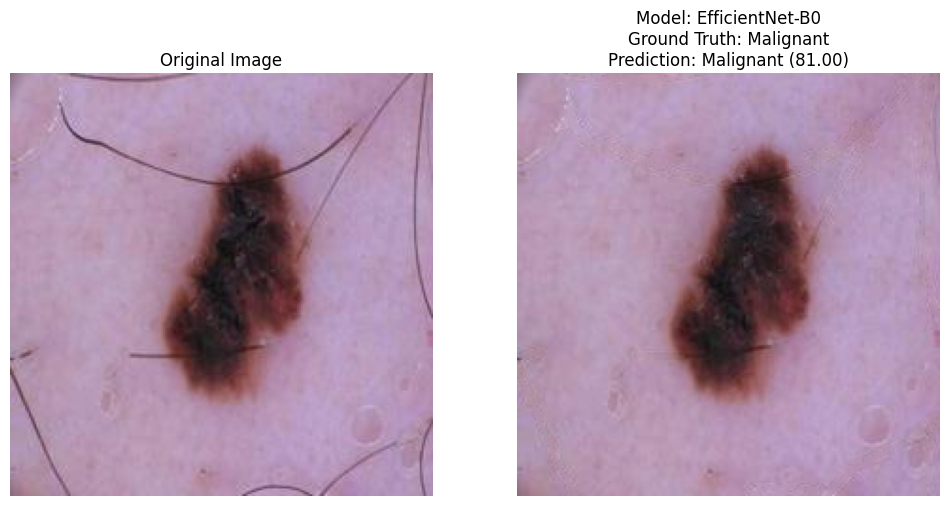

In [16]:
#predict single image
%cd /content/drive/MyDrive/ml_project/
import cv2
import os
import matplotlib.pyplot as plt
from utils.image_preprocessing import adaptive_dullrazor,smoothen_rounded_border
from skin_classifier.test_model import load_model, predict_single_image, load_test_data, evaluate_model
def process_predict_display(image_path, model, class_names, model_name):

    ground_truth = os.path.basename(os.path.dirname(image_path))
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    img_final, initial_mask, mask = adaptive_dullrazor(image_path)
    final_image = smoothen_rounded_border(img_final)
    result = predict_single_image(model, final_image, class_names)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original_image)
    axes[0].axis("off")
    axes[0].set_title("Original Image")

    axes[1].imshow(final_image)
    axes[1].axis("off")
    axes[1].set_title(f"Model: {model_name}\nGround Truth: {ground_truth}\nPrediction: {result['predicted_class']} ({result['confidence']:.2f})")

    plt.show()


# Load model
class_names = ['Benign', 'Malignant']
model = load_model("/content/drive/MyDrive/ml_project/results/best_efficientnet_b0_focal_loss.pth", len(class_names))

# Process, predict, and display
image_path = '/content/drive/MyDrive/my_dataset/test/Benign/6329.jpg'
process_predict_display(image_path, model, class_names, "EfficientNet-B0")
image_path = '/content/drive/MyDrive/my_dataset/test/Malignant/5623.jpg'
process_predict_display(image_path, model, class_names, "EfficientNet-B0")
image_path = '/content/drive/MyDrive/my_dataset/test/Benign/6388.jpg'
process_predict_display(image_path, model, class_names, "EfficientNet-B0")
image_path = '/content/drive/MyDrive/my_dataset/test/Malignant/5649.jpg'
process_predict_display(image_path, model, class_names, "EfficientNet-B0")